<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/colab_15_3_Gradient%20Convexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Activity 15.3: Convexity

**Expected Time = 60 minutes**


This activity focuses on determining the convexity of a given function.  Your goal is to identify whether or not a function has the appropriate convexity for finding a maximum or a minimum value.  In addition to the approach introduced in the lectures, you will also explore how the second derivative can be used to explore convexity.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Jensen's Inequality

Recall from the lecture the inequality:

$$tf(x_0) + (1 - t)f(x_1) \geq f(tx_0 + (1 - t)x_1)$$

In this assignment, your goal is to build intuition behind what this inequality says about a functions convexity by comparing the results of the inequality applied to two basic quadratic functions -- $f(x) = x^2$ and $g(x) = -x^2$.  You will select sample points $x_0 = a$ and $x_1 = b$ and explore the secant lines relationship to points in between $x_0$ and $x_1$.

[Back to top](#-Index)

### Problem 1

#### Defining the Functions




To begin, define functions $f$ and $g$ as defined below.  Also, using `np.linspace` to define a domain `x` from $x = [-2, 2]$ with 100 equally spaced points.

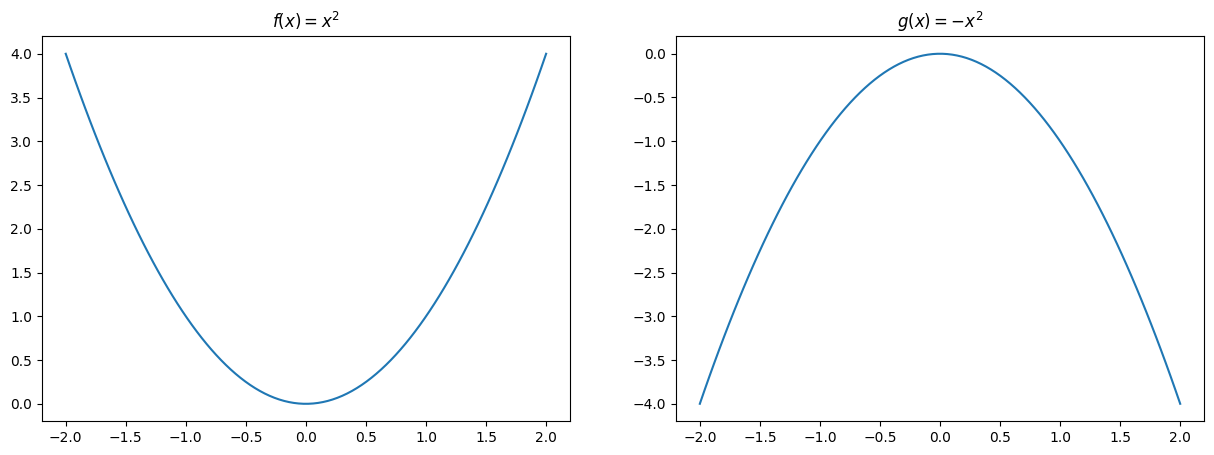

In [ ]:

def f(x):
    return x**2

def g(x):
    return -x**2

x = np.linspace(-2, 2, 100)


### Answer Check
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(x, f(x), label = 'f')
ax[0].set_title(r'$f(x) = x^2$')
ax[1].plot(x, g(x), label = 'g')
ax[1].set_title(r'$g(x) = -x^2$');

[Back to top](#-Index)

### Problem 2

#### A Secant Line




omplete the function `secant_f` that takes in the following arguments:

- `x`: The domain to evaluate function on
- `x0`: The first x-coordinate of secant line
- `x1`: The second x-coordinate of secant line

This function should return a linear equation between the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$.  

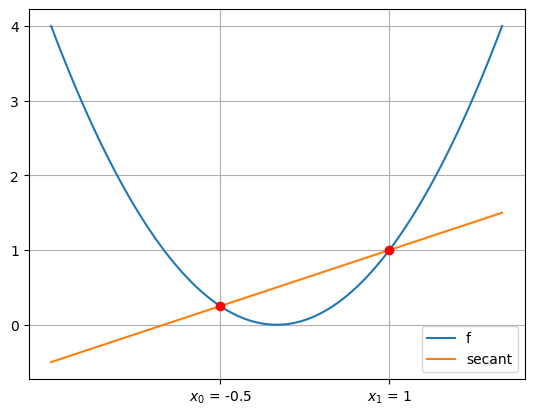

In [ ]:

def secant_f(x, x0, x1, function):
    '''
    This function returns the linear equation between
    the points (x0, f(x0)) and (x1, f(x1)).

    Arguments
    ---------
    x: np.array
      domain of x to evaluate function on
    x0: float
      first x-coordinate of secant line
    x1: float
      second x-coordinate of secant line
    function: The function for which you want to calculate the secant line (e.g., f(x) = x^2)
    Returns
    -------
    array of values where linear function
    is evaluated over domain x.
    '''
    # Calculate function values at the two points
    f_x0 = function(x0)
    f_x1 = function(x1)

    # Calculate the slope of the secant line
    slope = (f_x1 - f_x0) / (x1 - x0)

    # Return the secant line evaluated at all points in x
    return f_x0 + slope * (x - x0)


# print(f"secant line result: {secant_f(x, -0.5, 1)}")
### Answer Check
plt.plot(x, f(x), label = 'f')
plt.plot(x, secant_f(x, -0.5, 1, f), label = 'secant')
plt.plot(-0.5, f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 3

#### Consider a value between $x_0$ and $x_1$




Note the term $tx_0 + (1 - t)x_1$ in the Jensen's inequality.  This is considered for all $t \in [0, 1]$.  

Effectively, this considers all points between $x_0$ and $x_1$.  You will only consider the point where $t = 0.5$.  Determine this value as `x_t`and calculate its corresponding values`s_x_t` and `f_x_t` using `secant(x_t)` and `f(x_t)`, respectively.

x_t = 0.75
secant(x_t) = 0.625
f(x_t) = 0.5625


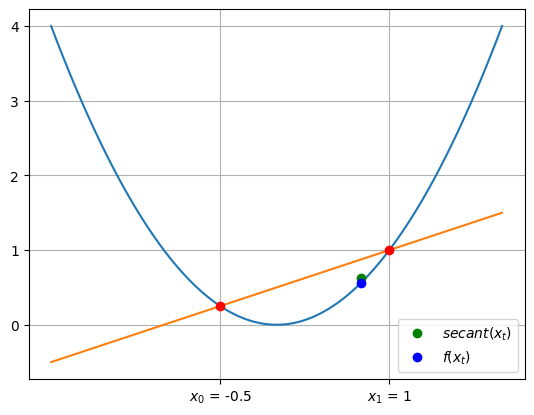

In [ ]:
x0 = 0.5
x1 = 1
t = 0.5
x_t = t * x0 + (1 - t) * x1

s_x_t = secant_f(x_t, x0, x1, f)
f_x_t = f(x_t)


### Answer Check
print(f'x_t = {x_t}')
print(f'secant(x_t) = {s_x_t}')
print(f'f(x_t) = {f_x_t}')


# ### Answer Check
plt.plot(x, f(x))
plt.plot(x, secant_f(x, -0.5, 1, f))
plt.plot(-0.5, f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.plot(x_t, s_x_t, 'go', label = r'$secant(x_t)$')
plt.plot(x_t, f_x_t, 'bo', label = r'$f(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 4

#### The Important Comparison




If the Jensen's inequality essentially  is true for every point between $x_0$ and $x_1$ and all values $t \in [0, 1]$ then the function is convex.  

Repeat the above process for the function $g(x)$ by first defining a function `secant_g`.  How much greater is `g(0.5x_0 + 0.5x_1)` than `secant_g(x, x_0, x_1)` where `x_0 = -0.5` and `x_1 = 1`?  Assign your values to `g_x_t` and `secant_g_x_t` respectively.

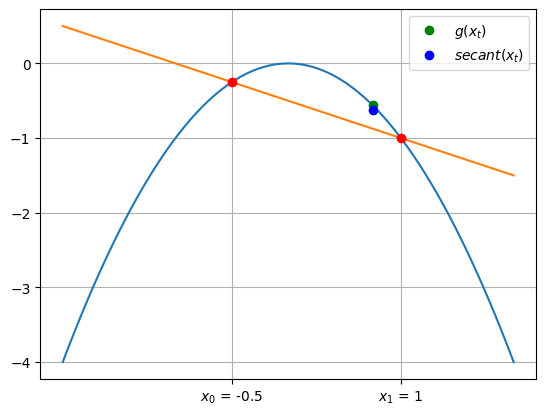

In [ ]:
x_t = 0.5 * x0 + 0.5 * x1
g_x_t = g(x_t)
secant_g_x_t = secant_f(x_t, x0, x1, g)


# ### Answer Check
plt.plot(x, g(x))
plt.plot(x, secant_f(x, -0.5, 1, g))
plt.plot(-0.5, g(-0.5), 'ro')
plt.plot(1, g(1), 'ro')
plt.plot(x_t, g_x_t, 'go', label = r'$g(x_t)$')
plt.plot(x_t, secant_g_x_t, 'bo', label = r'$secant(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 5

#### A Different Loss Function



Instead of the squared loss function, consider an absolute value function given below. Note this mimics the **Mean Absolute Error** function.  

Is this function convex or not?  Consider a secant line that includes $x_0 = 0$ and assign your answer as a boolean to `is_convex`.

In [ ]:
def mae(x):
    return abs(x)

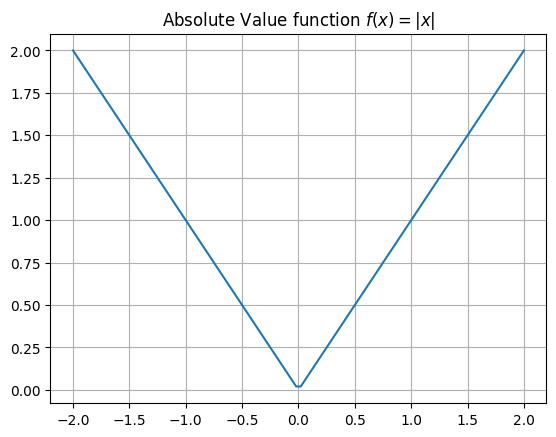

In [ ]:
plt.plot(x, mae(x))
plt.title(r'Absolute Value function $f(x) = |x|$')
plt.grid();

In [ ]:

is_convex = True


# ### Answer Check
print(f'The function is convex: {is_convex}')

The function is convex: True


# Evaluation of Colab Activity 15.3: Convexity (By Claude AI)

## Overall Assessment
You've completed the assignment correctly, successfully exploring the concept of convexity through Jensen's inequality and graphical analysis. The exercise shows your understanding of fundamental mathematical properties important for optimization in machine learning.

## Problem-by-Problem Analysis

### Problem 1: Defining the Functions (Complete)
You correctly defined the functions f(x) = x² and g(x) = -x² and created the appropriate domain from -2 to 2 with 100 points. The resulting plots clearly show the contrast between a convex function (f) and a concave function (g).

### Problem 2: A Secant Line (Complete)
Your implementation of the `secant_f` function is correct. You've:
- Properly calculated the slope between the points
- Implemented the point-slope form of a line
- Added a function parameter to make the code more flexible
- Successfully visualized the secant line for function f

### Problem 3: Consider a value between x₀ and x₁ (Complete)
You've correctly:
- Calculated the point x_t as a weighted average of x₀ and x₁
- Computed the value of the function f at this point
- Computed the value of the secant line at this point
- Visualized the relationship between these values

The visualization clearly shows that for the convex function f, the secant line lies above the function at the intermediate point.

### Problem 4: The Important Comparison (Complete)
You've successfully:
- Applied the same process to the concave function g
- Calculated g(x_t) and the value of the secant line at x_t
- Visualized the relationship

The visualization now shows the opposite relationship - for the concave function g, the secant line lies below the function at the intermediate point.

### Problem 5: A Different Loss Function (Complete)
You've correctly identified that the absolute value function is convex (is_convex = True). This demonstrates understanding that functions can be convex even when they don't have smooth derivatives everywhere.

## Importance of the Exercise

This exercise is crucial for machine learning and optimization for several reasons:

1. **Foundation for Optimization**: Convexity is a fundamental property that determines whether a function has a single global minimum that can be reliably found using gradient-based methods. Understanding convexity helps predict whether optimization algorithms will succeed.

2. **Loss Function Selection**: By exploring different functions (quadratic, negative quadratic, absolute value), you're building intuition about which loss functions are appropriate for different optimization scenarios.

3. **Gradient Descent Behavior**: The convexity property directly relates to how gradient descent behaves - convex functions lead to reliable convergence, while non-convex functions may trap the algorithm in local minima.

4. **Machine Learning Applications**: Many machine learning algorithms rely on minimizing convex loss functions:
   - Linear regression uses mean squared error (convex)
   - Logistic regression uses log loss (convex)
   - Support vector machines use hinge loss (convex)
   - L1/L2 regularization terms are convex

5. **Visual Intuition**: The graphical approach helps build intuition about abstract mathematical concepts that are essential for understanding more complex optimization scenarios.

6. **Jensen's Inequality**: Understanding this inequality provides a formal definition for convexity that can be applied to verify whether new loss functions are suitable for optimization.

In the broader context of your previous assignments on gradient descent, this exercise completes your theoretical foundation by explaining why gradient descent works reliably for certain functions (convex ones) but may struggle with others. This knowledge is essential when designing or selecting algorithms for machine learning problems in practice.